Ejercicio 2 
===========

In [1]:
#from Ejercicio1.Ejercicio1 import springs
from importlib.machinery import SourceFileLoader
import matplotlib.pyplot as plt
import numpy as np
plt.rc('figure', figsize=(10,8))
plt.rc('axes', labelsize=18)
from IPython.display import DisplayObject

Los elementos que necesito para resolver el problema estan en este módulo:

In [2]:
mef = SourceFileLoader(
    'mef',
    'mefmods.py'
).load_module()

In [3]:
Ejercicio2 = SourceFileLoader(
    'Ejercicio2',
    'Ejercicio2/Ejercicio2.py'
).load_module()

# Problema de la ménsula

El archivo `Mensula.g` contiene el mallado y las condiciones de contorno para la ménsula

In [4]:
! cat Ejercicio2/Mensula.g

GL
2
NODES
3
0.  0. 0  
1.  0. 0
1. 1. 0
ELEMENTS
3 2
2 0 1 1 200 
2 1 2 1 200 
2 2 0 1 200 
VINS
3
0 1 1 0 0
1 -1 1 0 0
2 -1 -1 100 0
# node  vin=1: desplazamiento, vin = -1: fuerza
# node  vinx viny valvinx valviny


In [5]:
M = Ejercicio2.Grilla(gefile='Ejercicio2/Mensula.g', case='Mensula')
#P = Ejerccio2.Grilla(gefile='Ejercicio2/Puente.ge', case='Puente', pltscale=100)

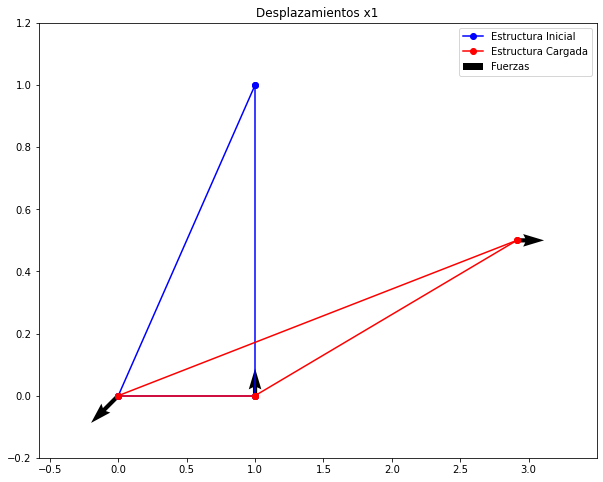

In [6]:
M.plotmesh(scale=1)

In [7]:
LocalKsM = mef.read_local_matrices('Ejercicio2/MatricesElementales-Mensula.dat')

In [8]:
LocalKsM

[array([[ 200.,    0., -200.,    0.],
        [   0.,    0.,    0.,    0.],
        [-200.,    0.,  200.,    0.],
        [   0.,    0.,    0.,    0.]]),
 array([[   0.,    0.,    0.,    0.],
        [   0.,  200.,    0., -200.],
        [   0.,    0.,    0.,    0.],
        [   0., -200.,    0.,  200.]]),
 array([[ 70.71068,  70.71068, -70.71068, -70.71068],
        [ 70.71068,  70.71068, -70.71068, -70.71068],
        [-70.71068, -70.71068,  70.71068,  70.71068],
        [-70.71068, -70.71068,  70.71068,  70.71068]])]

In [9]:
M.MC

array([[0, 1],
       [1, 2],
       [2, 0]])

In [10]:
M.MN

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

In [11]:
M.U

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.91421356],
       [-0.5       ]])

# Problema del Puente

In [19]:
P = Ejercicio2.Grilla(gefile='Ejercicio2/Puente.ge', case='Puente')

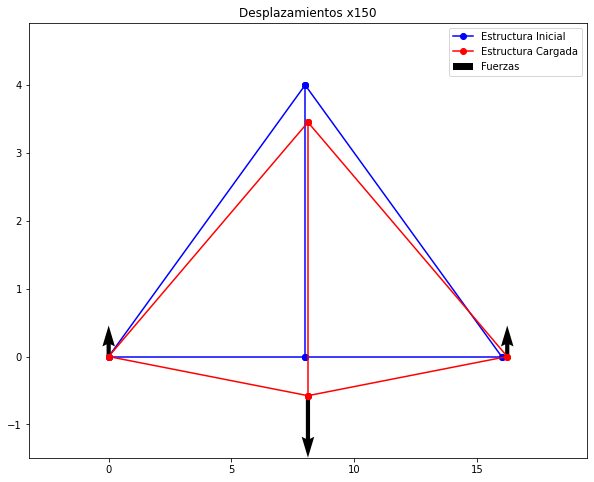

In [20]:
P.plotmesh(scale=150)

In [21]:
P.U

array([[ 0.        ],
       [ 0.        ],
       [ 0.0007619 ],
       [-0.0036534 ],
       [ 0.00152381],
       [ 0.        ],
       [ 0.0007619 ],
       [-0.00384387]])

In [22]:
P.F

array([[ 1.45519152e-11],
       [ 1.00000000e+04],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.00000000e+04],
       [ 0.00000000e+00],
       [-2.00000000e+04]])

In [23]:
LocalKsP = mef.read_local_matrices('Ejercicio2/MatricesElementales-Puente.dat')

In [24]:
LocalKsP

[array([[ 18782970. ,   9391485. , -18782970. ,  -9391485. ],
        [  9391485. ,   4695742.5,  -9391485. ,  -4695742.5],
        [-18782970. ,  -9391485. ,  18782970. ,   9391485. ],
        [ -9391485. ,  -4695742.5,   9391485. ,   4695742.5]]),
 array([[ 26250000.,         0., -26250000.,         0.],
        [        0.,         0.,         0.,         0.],
        [-26250000.,         0.,  26250000.,         0.],
        [        0.,         0.,         0.,         0.]]),
 array([[ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
        [ 0.00e+00,  1.05e+08,  0.00e+00, -1.05e+08],
        [ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
        [ 0.00e+00, -1.05e+08,  0.00e+00,  1.05e+08]]),
 array([[ 18782970. ,  -9391485. , -18782970. ,   9391485. ],
        [ -9391485. ,   4695742.5,   9391485. ,  -4695742.5],
        [-18782970. ,   9391485. ,  18782970. ,  -9391485. ],
        [  9391485. ,  -4695742.5,  -9391485. ,   4695742.5]]),
 array([[ 26250000.,         0., -26250000.,    